# Assignment 3.1:  Module 3 Exercise Questions | Python
### Ryan S. Dunn | University of San Diego | M.S. Applied Data Science 
#### for detailed explainations on each question, please see the R output above

In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

## Data Science Using Python and R:  Chapter 5 - Page 78: Questions 28, 29, 30 , 31, 32, 33, 34

In [41]:
#import the data
churn = pd.read_csv("/Users/ryan_s_dunn/Documents/USD MS-ADS/Applied Data Mining 502/Module 3/Datasets/Churn", header = 0)
#churn.head()

### 28. Partition the data set, so that 67% of the records are included in the training data set and 33% are included in the test data set.  Use a bar graph to confirm your proportions. 

In [42]:
#partition the data set into train and test
churn_train, churn_test = train_test_split(churn, test_size = 0.33, random_state = 7)

The total count of rows are: 3333


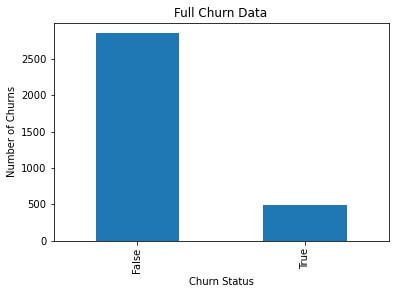

In [43]:
#total data set
churn.Churn.value_counts().plot(kind='bar', title = 'Full Churn Data')
plt.ylabel('Number of Churns')
plt.xlabel('Churn Status')
print('The total count of rows are:' ,  churn.shape[0])

The total count of rows are: 2233


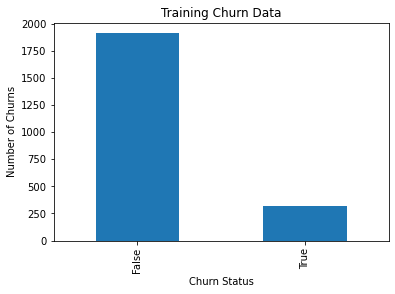

In [44]:
#training barcharts
churn_train.Churn.value_counts().plot(kind='bar', title = 'Training Churn Data')
plt.ylabel('Number of Churns')
plt.xlabel('Churn Status')
print('The total count of rows are:' ,  churn_train.shape[0])

The total count of rows are: 1100


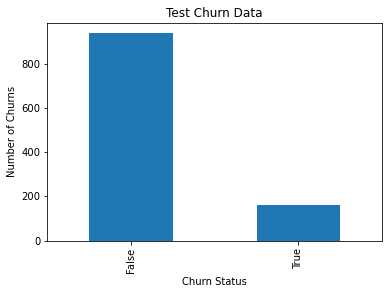

In [45]:
#test barcharts
churn_test.Churn.value_counts().plot(kind='bar', title = 'Test Churn Data')
plt.ylabel('Number of Churns')
plt.xlabel('Churn Status')
print('The total count of rows are:' ,  churn_test.shape[0])

In [46]:
#validated percentages of total data:
print("The training data set contains", round(churn_train.shape[0]/churn.shape[0] * 100 ,2),"% of the data.")
print("The test data set contains" , round(churn_test.shape[0]/churn.shape[0] * 100 ,2),"% of the data.")

The training data set contains 67.0 % of the data.
The test data set contains 33.0 % of the data.


### 29. Identify the total number of records in the training data set and how many records in the training data set have a churn value of true. 

In [47]:
#total number of records in training data set
print("The training data set contains", round(churn_train.shape[0]/churn.shape[0] * 100 ,2),"% of the data.")

The training data set contains 67.0 % of the data.


In [48]:
#how many records have a churn value of true
training_churn_true = churn_train.loc[churn_train['Churn'] == True]
print("The training data set contains", round(training_churn_true.shape[0]), "records.")

The training data set contains 320 records.


### 30. Use your answers from the previous exercise to calculate how many true churn records you need to resample in order to have 20% of the rebalanced data set have true churn values. 

In [49]:
#total records in training data set
churn_train.shape[0]

2233

In [50]:
#values of True and False within training set
churn_train['Churn'].value_counts()

False    1913
True      320
Name: Churn, dtype: int64

In [51]:
#find the value of how many we need with 20 %
n_new = round(((0.2 * churn_train.shape[0]) - training_churn_true.shape[0])/0.8,0)
print("We need to resample", n_new, "records whose response is 'True' and add them to our training set")

We need to resample 158.0 records whose response is 'True' and add them to our training set


### 31. Perform the rebalancing described in the previous exercies and confirm that 20% of the records in the rebalanced data set have true churn values. 

In [52]:
#isolate records we want to resample (only True Churn's)
to_resample = churn_train.loc[churn_train['Churn'] == True]

In [53]:
#Sample from our records of interest
our_resample = to_resample.sample(n = 158 , replace = True)

In [15]:
#concat two data sets by putting rows on top of eachother (union)
rebalanced_train = pd.concat([churn_train, our_resample])

In [54]:
#view the total count of records in the new data set
rebalanced_train.shape[0]

2391

In [55]:
#check new True and False values in the new rebalanced dataframe
rebalanced_train['Churn'].value_counts()

False    1913
True      478
Name: Churn, dtype: int64

In [56]:
#create a dataframe of just the rebalanced True Churn values and obtain count
total_true = rebalanced_train.loc[rebalanced_train['Churn'] == True]
total_true.shape[0]

478

In [57]:
#validate that new percentage of data is 20%
new_test_percentage =  total_true.shape[0]/ rebalanced_train.shape[0]
print(round(new_test_percentage,2)*100,"% of the data is now 'True'.")

20.0 % of the data is now 'True'.


### 32. Which baseline model do we use to compare our classification model performance against? To which value does this baseline model assign all predictions? What is the accuracy of this model?
<br>
The answer is:

### 33. Validate your partition by testing for the difference in mean "day minutes for the training set versus the test set. 

In [58]:
print("Rebalanced training data 'Day Mins' mean is:", round(rebalanced_train['Day Mins'].mean(axis=0),2))
print("Churn test data 'Day Mins' mean is:", round(churn_test['Day Mins'].mean(axis=0),2))

Rebalanced training data 'Day Mins' mean is: 181.38
Churn test data 'Day Mins' mean is: 179.82


### 34. Validate your partition by testing for the difference in proportion of true churn records for the training set versus the test set. 

In [95]:
# how do you do this?

## Data Science Using Python and R:  Chapter 7 - Page 109:  Questions 23, 24, 25, 26, 27, 28, 29, 30

### 23. Using the training data set, create a C5.0 model (Model 1) to predict a customer's Income using Marital Status and Capital Gains Loses.  Obtain the predicted responses. 

In [69]:
#import libraries for analysis
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [86]:
#import the training data set
training_data = pd.read_csv(trainin, header = 0)
#training_data.head()

In [61]:
#set outcome variable as income
y = training_data[['Income']]

In [62]:
#create a numpy array of the different values within the Marital status attribute
mar_np = np.array(training_data['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames =True)

/Users/ryan_s_dunn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tools/tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [88]:
mar_cat_pd = pd.DataFrame(mar_cat)

#new dataframe with marital status categorical variables as numbers and capital gains/lossees
X = pd.concat((training_data[['Cap_Gains_Losses']],mar_cat_pd), axis = 1)

In [89]:
#assign the names back to the variables
X_names = ['Cap_Gains_Losses', "Divorced", "Married", "Never-married", "Separated", "Widowed"]
y_names = ["<=50K",">50K"]

In [65]:
#develop the C5.0 model
model_1 = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes=5).fit(X,y)

In [92]:
#predict the income variable from the mode.
k = model_1.predict(X)

In [67]:
#develop a C5.0 model to predict a customers Income 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=1)                              

### 24. Evaluate Model 1 using the test data set.  Construct a contingency table to compare the actual and predicted values of Income. 

In [129]:
#evaluate the model
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      1597
           1       0.57      0.26      0.35       660

    accuracy                           0.73      2257
   macro avg       0.66      0.59      0.59      2257
weighted avg       0.70      0.73      0.69      2257



In [124]:
#display the confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

,0,1
0,1597,0
1,660,0


In [147]:
#totals for the corresponding metrics
TN_1 = 1597
TP_1 = 0 
FN_1 = 660
FP_1 = 0 
GT_1 = TN_1 + TP_1 + FN_1 + TP_1
#GT_1

### 25. For Model 1, recapitulate Table 7.4 from the text, calculating all of the model evaluation measures shown in the table. Call this table the Model Evaluation Table.  Leave space for Model 2. 

In [155]:
metrics = ["Accuracy", "Error Rate", "Specificity", "Precision","F1"]
m1_eval = [(TN_1 + TP_1)/GT_1, (1 - ((TN_1 + TP_1)/GT_1)), TN_1 / (TN_1 + FN_1), 0.00, 2*(0.00 * TN_1 / (TN_1 + FN_1))]
m2_eval = ['NA','NA','NA','NA']

df1 = pd.DataFrame(list(zip(metrics, m1_eval,m2_eval)),columns = ['Metrics', 'Module 1 Results', 'Module 2 Results'])
df1

,Metrics,Module 1 Results,Module 2 Results
0,Accuracy,0.707576,NA
1,Error Rate,0.292424,NA
2,Specificity,0.707576,NA
3,Precision,0.000000,NA


### 26. Clearly and completely interpret each of the Model 1 evaluation measures from the Model Evaluation Method.

For detialed explainations, see the R output. 

### 27. Create a cost matrix, called the 3x cost matrix, that specifies a false positive is four times as bad as a false negative. 

In [161]:
list_1 = [0,1,4,0]
cost_matrix = pd.DataFrame(list_1, rows = 2)
cost_matrix

TypeError: __init__() got an unexpected keyword argument 'rows'

## Data Science using Python and R:  Chapter 8 - Page 126:  Questions 31, 32, 33, 34

### 31. Run the Naive Bayes classifier to classify persons as living or dead based on sex and education. 

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
#training data
death_training = pd.read_csv("/Users/ryan_s_dunn/Documents/USD MS-ADS/Applied Data Mining 502/Module 3/Datasets/Framingham_Training", header = 0)

#test data
death_test = pd.read_csv("/Users/ryan_s_dunn/Documents/USD MS-ADS/Applied Data Mining 502/Module 3/Datasets/Framingham_Test", header = 0)

In [93]:
print(death_training.shape)
print(death_test.shape)

(7953, 5)
(2257, 5)


In [97]:
death_training.head(1)

,Index,Sex,Age,Educ,Death
0,1,1,39,4,0


<AxesSubplot:title={'center':'Death Counts'}>

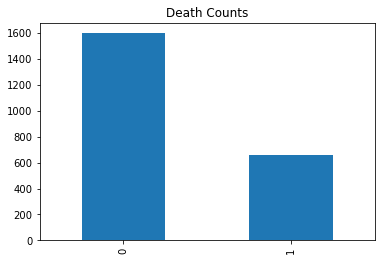

In [75]:
#review the actual count of deaths by 0 & 1 for validation 
death_test.Death.value_counts().plot(kind='bar', title = 'Death Counts')

In [76]:
#develop the training Xn and Y variables
X_train = death_training[['Sex','Age']]
y_train = death_training['Death']

In [77]:
#run the Navie Bayes algorithm
nb = MultinomialNB(alpha = 0.5).fit(X_train, y_train)

### 32. Evaluate the Naive Bayes model on the framingham_nb_test data set.  Display the results in a contingency table.  Edit the row and column names of the table to make the table more readable. Include a total row and column.

In [78]:
#set up the x variables within the test set
X_test = death_test[['Sex','Age']]
y_test = death_test['Death']

In [100]:
#predict the test variables with the Naive Bayes Model
y_pred = nb.predict(X_test)

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1597
           1       0.00      0.00      0.00       660

    accuracy                           0.71      2257
   macro avg       0.35      0.50      0.41      2257
weighted avg       0.50      0.71      0.59      2257



/Users/ryan_s_dunn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryan_s_dunn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryan_s_dunn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
cf_dm = pd.DataFrame(confusion_matrix(y_test, y_pred))
#cf_dm = pd.crosstab("True", "False")
cf_dm

,0,1
0,1597,0
1,660,0


### 33. According to your table in the previous exercise, find the following values for the Naive Bayes model:

#### (a) Accuracy:

In [81]:
from sklearn.metrics import accuracy_score
print('The accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.7075764288879043


#### (b) Error Rate:

In [120]:
print('The error rate is', (1 - accuracy_score(y_pred,y_test)))

The error rate is 0.2924235711120957


### 34. According to your contingency table, find the following values for the Naive Bayes model:

In [162]:
#create the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1471,  126],
       [ 491,  169]])

In [112]:
#select the individual evaluation metrics from the confusion matrix
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

#review each evaluation method for accuracy
print(TN)
print(FP)
print(FN)
print(TP)

1597
0
660
0


In [84]:
t1 = pd.crosstab(death_training['Sex'], death_training['Age'])
t1['Total'] = t1.sum(axis=1)
t1.loc['Total'] = t1.sum()
t1

Age,32,33,34,35,36,37,38,39,40,41,...,73,74,75,76,77,78,79,80,81,Total
Sex,,,,,,,,,,,,,,,,,,,,,
1,0,1,2,9,33,27,45,55,58,60,...,29,28,17,12,9,0,5,2,0,3437
2,1,3,8,17,33,34,51,69,90,79,...,46,31,32,17,15,9,8,2,2,4516
Total,1,4,10,26,66,61,96,124,148,139,...,75,59,49,29,24,9,13,4,2,7953


<AxesSubplot:xlabel='Sex'>

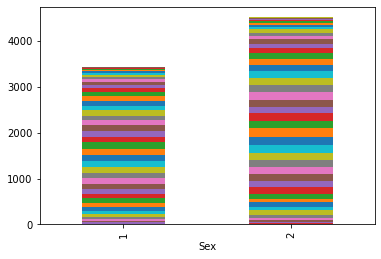

In [85]:
t1_plot = pd.crosstab(death_training['Sex'], death_training['Age'])
t1_plot.plot(kind='bar', legend = None, stacked = True)

#### (a) How often it correctly classifies dead persons.

#### (b) How often it correctly classifies living persons.